# Kevin Alvarez CSC 217 Fall 2019 Homework 7

In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Say that I run exactly a mile every single day and record the time. Unfortunately I"m not getting exactly better at it over time, though there is noise in my performance. In fact, my mile time follows a normal distribution with a mean of seven minutes (for ease we'll say 420 seconds) and a standard deviation of fifteen seconds.

Unfortunately my phone gets hacked, and there's a chance that someone has gone in and modified my historical run times. How will I know which times are mine, and which may be compromised?

1) Create a PDF graph of this distribution with the proper labels on the axes.

Text(0.5, 0.92, '1 Mile PDF Graph')

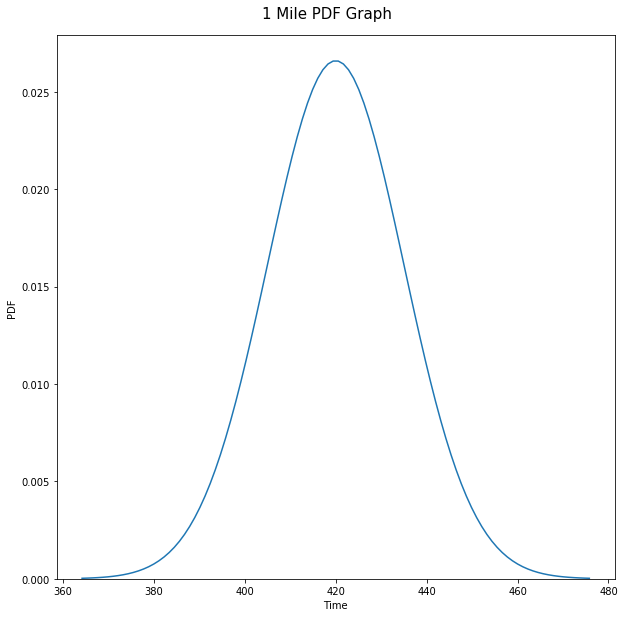

In [3]:
dist = stats.norm(loc = 420, scale = 15)
fig = plt.figure(figsize=(10,10))
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.ylim(bottom=0)
plt.xlabel('Time')
plt.ylabel('PDF')
fig.suptitle('1 Mile PDF Graph', fontsize=15, y=0.92)

2) Say we wanted to create a rejection region for any mile times that look suspicious. If we set the rejection region with a p-value of 0.05 in a two-sided test, what values would constitute the cutoffs?

In [10]:
dist.ppf(0.025)

449.3994597681008

In [11]:
dist.ppf(0.975)

449.3994597681008

3) Say now that I'm only concerned about looking too slow, meaning I'm only concerned about outliers at the lower end. If we set the rejection region with a p-value of 0.05, what value would constitute the cutoff?

In [ ]:
dist.ppdf(0.050)

4) If I see a run-time of 396 seconds, what p-value would this value get in a one-sided test? Can we reject the null hypothesis at a significance level of 0.05? What p-value would it get in a two-sided test? Can we reject the null hypothesis at a significance level of 0.05?

In [8]:
1 - dist.cdf(396) # One sided

0.945200708300442

In [9]:
(1 - dist.cdf(396)) / 2 # Two sided test

0.472600354150221

5) Now I want to look at the mean of twenty random samples from this distribution to see if this is different than what I would expect. What would the mean and standard deviation of this new distribution (of the mean of twenty samples taken from the underlying distribution) be?

In [14]:
sample = dist.rvs(20)
distRand = stats.norm(loc = np.mean(sample), scale = np.std(sample))

6) Again, I'm only concerned about looking too slow. What is the rejection region of the mean of twenty random samples taken from the distribution at a signifiance level of 0.01?

In [15]:
distRand.ppf(0.005) # Less than

384.7335922147392

In [16]:
distRand.ppf(0.995) # Greater than

460.88310902198367

7) Say that I'm unsure of my original standard deviation estimation, especially because the data may have been tampered. I want to use my twenty random samples below to estimate the standard deviation of the underlying distribution. First, what would the mean and standard deviation of this new distribution (of the mean of twenty samples taken from the underlying distribution given our new standard deviation) be?

In [11]:
values =  [417.95,
           380.87,
           424.89,
           404.97,
           381.5,
           416.86,
           409.4,
           429.15,
           436.96,
           437.95,
           392.05,
           426.85,
           415.48,
           428.43,
           424.53,
           415.31,
           415.37,
           422.77,
           425.23]

In [ ]:
np.mean(values)

In [ ]:
np.std(values)

8) Again, I'm only concerned about looking too slow. What is the rejection region of the mean of twenty random samples taken from the distribution at a signifiance level of 0.01?

In [ ]:
dist = stats.norm(loc = np.mean(values), scale = np.std(values))
dist.ppf(0.005) # Less than

In [ ]:
dist.ppf(0.995) # Greater than

9) What is the p-value of the mean of our samples (one-sided test)? Can we reject the null hypothesis that these samples could been taken from the original distribution?

In [ ]:
1 - dist.cdf(np.mean(values))

BONUS: 10) Say that the probability of me coming to class on time is 30%. If I come into class fifteen times in the semester, you could say that the distribution of me coming into class on time throughout the semester fits a binomial distribution with a probability of 0.3 and fifteen independent trials.

Using the normal approxmation, say you wanted to calculate the probability that I've been replaced with a body double throughout the semester. At a signifiance level of 0.05 in a two-sided test, what would the **discrete** rejection regions be that it wasn't actually me coming to class anymore? Or, to put it another way, how little and many times would I have to come to class on time for it to be actually suspicious? Be sure to keep the **continuity correction** in mind and use the underlying binomial distribution for proof if you need to.